In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### Just testing

--------------------------------------------------------------------------------------------

In [2]:
# df=pd.read_json('yelp_training_set_review.json',lines=True)
# df

In [3]:
# d1=list(df['votes'])
# pd.DataFrame(d1)

--------------------------------------------------------------------------------------------------

In [4]:
df=pd.read_csv('yelp.csv')

In [5]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
df.shape

(10000, 10)

### Splitting date column to year and month column

In [7]:
date_time=pd.to_datetime(df['date'])

In [8]:
month_obt=[]
year_obt=[]
for i in date_time:
    month_obt.append(i.month)
    year_obt.append(i.year)

In [9]:
df['month']=month_obt
df['year']=year_obt

In [10]:
df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,month,year
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1,2011
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,7,2011
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,6,2012
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,5,2010
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1,2012


In [11]:
df.describe()

,stars,cool,useful,funny,month,year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,6.408900,2010.520100
std,1.214636,2.067861,2.336647,1.907942,3.433756,1.429406
min,1.000000,0.000000,0.000000,0.000000,1.000000,2005.000000
25%,3.000000,0.000000,0.000000,0.000000,3.000000,2010.000000
50%,4.000000,0.000000,1.000000,0.000000,6.000000,2011.000000
75%,5.000000,1.000000,2.000000,1.000000,9.000000,2012.000000
max,5.000000,77.000000,76.000000,57.000000,12.000000,2013.000000


In [12]:
df['year'].value_counts()

2012    3025
2011    2791
2010    1852
2009    1171
2008     765
2007     285
2006      55
2013      52
2005       4
Name: year, dtype: int64

### Plotting different graphs for review star vs. year and month

In [13]:
def review_star(data,star_val,fname,fname2):
    r_year=data[data['stars']==star_val][fname].value_counts()
    r_month=data[data['stars']==star_val][fname2].value_counts()
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.title(str(star_val)+' star review vs '+str(fname))
    r_year.plot(kind='bar')
    plt.subplot(1,2,2)
    plt.title(str(star_val)+' star review vs '+str(fname2))
    r_month.plot(kind='bar')

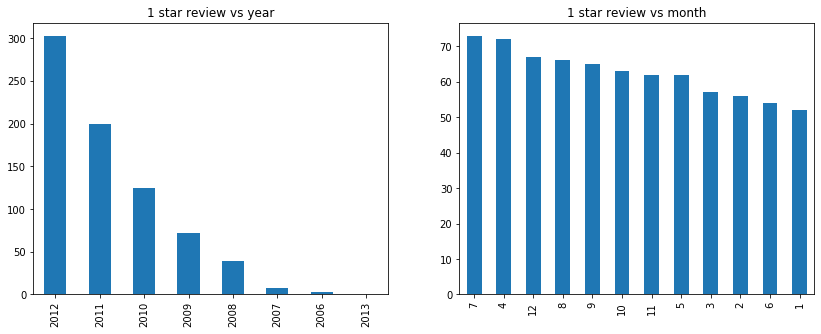

In [14]:
review_star(df,1,'year','month')

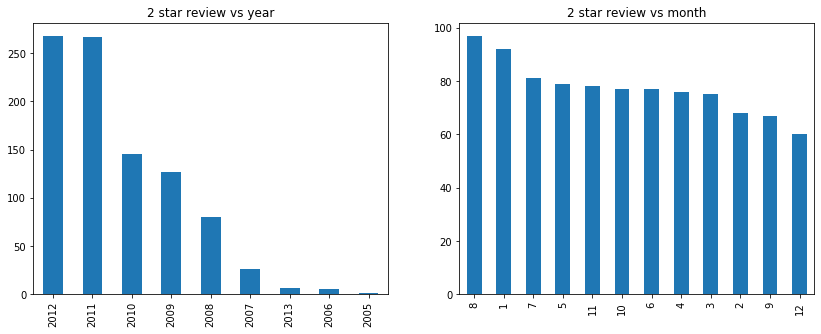

In [15]:
review_star(df,2,'year','month')

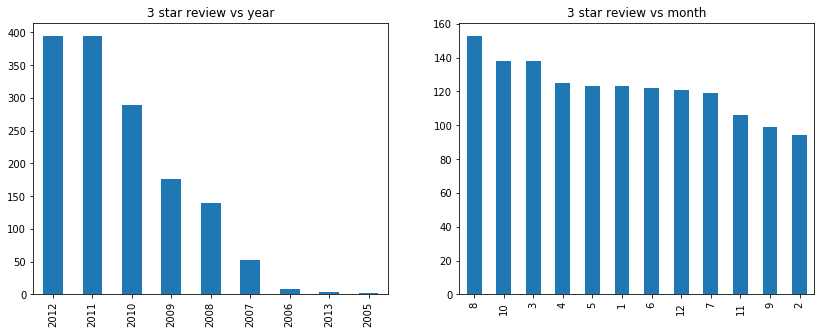

In [16]:
review_star(df,3,'year','month')

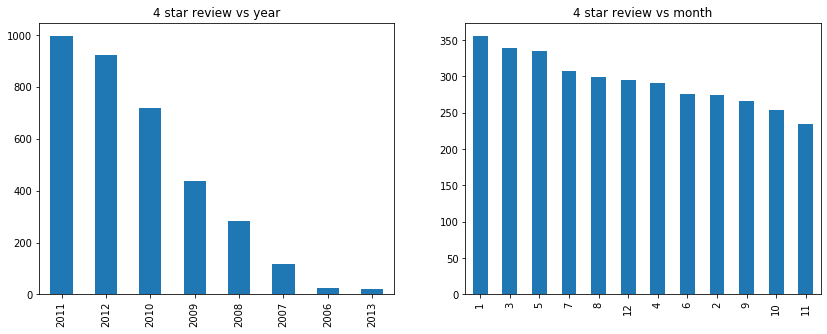

In [17]:
review_star(df,4,'year','month')

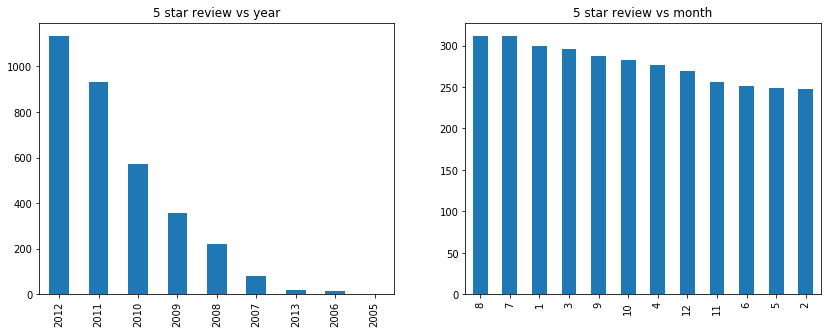

In [18]:
review_star(df,5,'year','month')

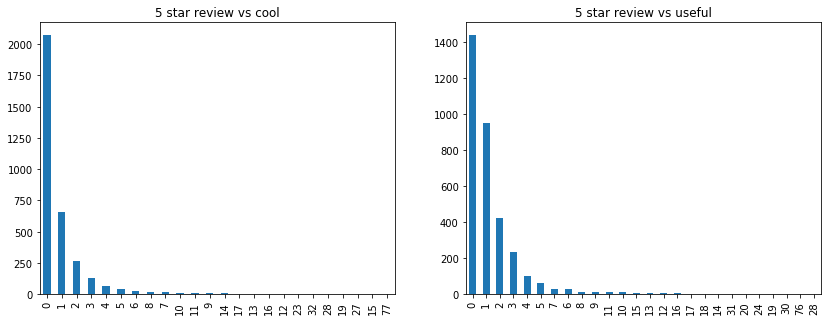

In [19]:
review_star(df,5,'cool','useful')

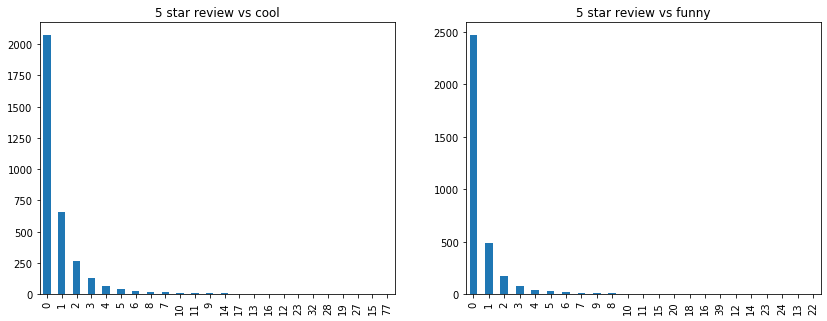

In [20]:
review_star(df,5,'cool','funny')

### Dropping some columns and checking null value

In [21]:
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,month,year
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1,2011
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,7,2011
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,6,2012


In [22]:
df.drop(columns=['date','business_id','review_id','type','user_id'],inplace=True)

In [23]:
df.isnull().sum()

stars     0
text      0
cool      0
useful    0
funny     0
month     0
year      0
dtype: int64

In [24]:
df

,stars,text,cool,useful,funny,month,year
0,5,My wife took me here on my birthday for breakf...,2,5,0,1,2011
1,5,I have no idea why some people give bad review...,0,0,0,7,2011
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,6,2012
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,5,2010
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,1,2012
...,...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0,7,2012
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0,1,2012
9997,4,I recently visited Olive and Ivy for business ...,0,0,0,11,2010
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0,12,2012


### Checking correlations of different columns with stars

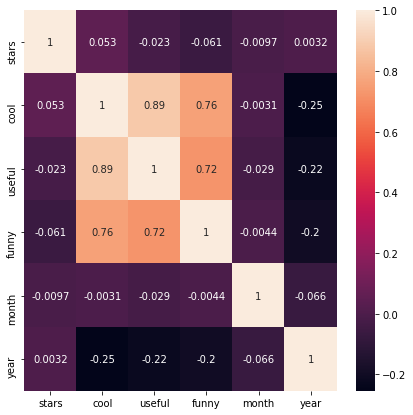

In [25]:
first_corr=df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(first_corr,annot=True)

### Featurisation year and month columns 

In [26]:
df['year'].value_counts()

2012    3025
2011    2791
2010    1852
2009    1171
2008     765
2007     285
2006      55
2013      52
2005       4
Name: year, dtype: int64

In [27]:
df['year']=df['year'].apply(lambda x:'old' if x <= 2008 else 'new')

In [28]:
month_custom=[]
month=df['month']
for i in month:
    if (i<=2 or i>=11):
        month_custom.append('winter')
    elif (i>2 and i<=7):
        month_custom.append('summer')
    else:
        month_custom.append('automn')

In [29]:
df['month']=month_custom

In [30]:
df.head(3)

,stars,text,cool,useful,funny,month,year
0,5,My wife took me here on my birthday for breakf...,2,5,0,winter,new
1,5,I have no idea why some people give bad review...,0,0,0,summer,new
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,summer,new


### Featurisation year and month columns 

In [31]:
df['funny']=df['funny'].apply(lambda x:'funny' if x <= 4 else 'not funny')

In [32]:
df['funny'].value_counts()

funny        9680
not funny     320
Name: funny, dtype: int64

In [33]:
df['cool']=df['cool'].apply(lambda x:'cool' if x <= 4 else 'not cool')

In [34]:
df['cool'].value_counts()

cool        9599
not cool     401
Name: cool, dtype: int64

In [35]:
df['useful']=df['useful'].apply(lambda x:'useful' if x <= 4 else 'nouseful')

In [36]:
df['useful'].value_counts()

useful      9347
nouseful     653
Name: useful, dtype: int64

In [37]:
df.head(4)

,stars,text,cool,useful,funny,month,year
0,5,My wife took me here on my birthday for breakf...,cool,nouseful,funny,winter,new
1,5,I have no idea why some people give bad review...,cool,useful,funny,summer,new
2,4,love the gyro plate. Rice is so good and I als...,cool,useful,funny,summer,new
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",cool,useful,funny,summer,new


### Combining columns text,cool,useful,funny,month,year into a single column

In [38]:
df['combined_text'] =df['text']+df['cool']+' '+df['useful']+' '+df['funny']+' '+df['month']+' '+df['year']

In [39]:
df['combined_text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!cool nouseful funny winter new'

### Cleaning the text data

##### removing punctuation,tokenzing,removing  stopwords,lemmatizing

In [40]:
punc = string.punctuation
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer_wn = nltk.WordNetLemmatizer()
def cleaning(text):
    no_punc = "".join([words for words in text if words not in punc])
    tokenized_text = re.split('\W+',no_punc)
    no_sw = [words.lower() for words in tokenized_text if words not in stop_words]
    cleaned_text = " ".join([lemmatizer_wn.lemmatize(words) for words in no_sw])
    return cleaned_text

In [41]:
df['cleaned_text']=df['combined_text'].apply(lambda x:cleaning(x))

In [42]:
df['cleaned_text'][0]

'my wife took birthday breakfast excellent the weather perfect made sitting outside overlooking ground absolute pleasure our waitress excellent food arrived quickly semibusy saturday morning it looked like place fill pretty quickly earlier get better do favor get bloody mary it phenomenal simply best ive ever im pretty sure use ingredient garden blend fresh order it amazing while everything menu look excellent i white truffle scrambled egg vegetable skillet tasty delicious it came 2 piece griddled bread amazing absolutely made meal complete it best toast ive ever anyway i cant wait go backcool nouseful funny winter new'

In [43]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

### Converting text to vector

In [44]:
vect = CountVectorizer(min_df=17, ngram_range=(1, 2))

In [45]:
converted_text=vect.fit_transform(df['cleaned_text'])

In [46]:
vect.get_feature_names()

['10',
 '10 minute',
 '10 year',
 '100',
 '1000',
 '101',
 '1015',
 '11',
 '110',
 '11am',
 '12',
 '13',
 '14',
 '15',
 '15 minute',
 '150',
 '1520',
 '16',
 '17',
 '18',
 '1st',
 '20',
 '20 minute',
 '20 year',
 '200',
 '2010',
 '21',
 '22',
 '23',
 '24',
 '24 hour',
 '25',
 '250',
 '2nd',
 '30',
 '30 min',
 '30 minute',
 '300',
 '32',
 '34',
 '35',
 '35 star',
 '3rd',
 '40',
 '400',
 '45',
 '45 minute',
 '4pm',
 '4th',
 '50',
 '500',
 '55',
 '5pm',
 '5th',
 '60',
 '6pm',
 '70',
 '700',
 '75',
 '7pm',
 '7th',
 '80',
 '8pm',
 '90',
 '930',
 '99',
 'ability',
 'able',
 'able get',
 'about',
 'absolute',
 'absolutely',
 'absolutely amazing',
 'absolutely delicious',
 'absolutely love',
 'ac',
 'accent',
 'accept',
 'acceptable',
 'access',
 'accessible',
 'accessory',
 'accident',
 'accommodate',
 'accommodating',
 'accomodating',
 'accompanied',
 'accompanying',
 'according',
 'account',
 'acknowledge',
 'acoustic',
 'across',
 'across street',
 'act',
 'action',
 'active',
 'activity',

###  Splitting of data

In [47]:
X=converted_text
y=df['stars']

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.30, random_state=20)

### Model training

In [49]:
model=MultinomialNB(alpha=1)
# model = RandomForestRegressor()
model.fit(X_train,Y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

### Predictions

In [50]:
predictions=model.predict(X_test)

In [51]:
predictions

array([4, 4, 4, ..., 4, 3, 2], dtype=int64)

### COnfusion matrix,accuracy,etc

In [52]:
confusion_matrix(Y_test,predictions)

array([[126,  34,  10,  12,  35],
       [ 75,  81,  75,  38,  29],
       [ 21,  51, 145, 175,  54],
       [ 22,  33,  91, 568, 299],
       [ 26,   8,  29, 294, 669]], dtype=int64)

In [53]:
accuracy_score(Y_test,predictions)

0.5296666666666666

In [67]:
report=classification_report(Y_test,predictions, labels=[1, 2, 3, 4, 5])

In [76]:
print(report)

              precision    recall  f1-score   support

           1       0.47      0.58      0.52       217
           2       0.39      0.27      0.32       298
           3       0.41      0.33      0.36       446
           4       0.52      0.56      0.54      1013
           5       0.62      0.65      0.63      1026

    accuracy                           0.53      3000
   macro avg       0.48      0.48      0.48      3000
weighted avg       0.52      0.53      0.52      3000

